In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib.pylab import rcParams
sns.set()

In [2]:
trip_data = "Resources/march_only_trips_2020 2.csv"

In [3]:
trip_data_df = pd.read_csv(trip_data,encoding="ISO-8859-1")
trip_data_df


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,00019f1f256bfa706cf8641b1aa611f624325010,2020-03-01 00:15:00,03/01/2020 12:30:00 AM,320.0,1.5,1.703184e+10,1.703159e+10,60.0,59.0,5.0,...,3.08,10.08,False,1,41.832937,-87.653583,POINT (-87.6535834197 41.8329371807),41.826833,-87.672926,POINT (-87.6729255394 41.8268330147)
1,000753ac45c450e21abdf1a4c961176bcfaefda3,2020-03-01 00:15:00,03/01/2020 12:45:00 AM,1512.0,8.8,1.703181e+10,1.703106e+10,NaN,6.0,12.5,...,3.53,19.03,False,1,NaN,NaN,NaN,41.942692,-87.651771,POINT (-87.6517705068 41.9426918444)
2,002ec2876ddbe0274826cdc660c2a270b99e4554,2020-03-01 00:15:00,03/01/2020 12:15:00 AM,188.0,0.6,1.703108e+10,1.703132e+10,8.0,32.0,2.5,...,3.08,8.58,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
3,9270c6ca6296127112be3219f702101d1d338aa4,2020-03-01 00:15:00,03/01/2020 12:45:00 AM,1774.0,6.9,1.703122e+10,1.703129e+10,22.0,29.0,25.0,...,0.00,25.00,True,3,41.920802,-87.694532,POINT (-87.6945323419 41.9208017043),41.862414,-87.732470,POINT (-87.7324696377 41.8624142737)
4,004be16829b751eb031b6b4f05a33542980c1940,2020-03-01 00:15:00,03/01/2020 12:30:00 AM,672.0,2.0,1.703107e+10,1.703122e+10,7.0,22.0,17.5,...,3.08,20.58,False,1,41.921778,-87.651062,POINT (-87.6510618838 41.9217781876),41.921273,-87.685082,POINT (-87.6850821101 41.9212731053)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265924,fd14a92122b98bf648920df335057672a9989a92,2020-03-31,03/31/2020 12:15:00 AM,901.0,3.7,NaN,NaN,42.0,42.0,7.5,...,3.08,10.58,False,1,41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603)
5265925,fd3497661c46ed6a8256c9754533a59ae61db3a0,2020-03-31,03/31/2020 12:30:00 AM,2035.0,15.0,1.703101e+10,NaN,1.0,NaN,22.5,...,3.08,25.58,False,1,42.016011,-87.680162,POINT (-87.680162272 42.0160105638),NaN,NaN,NaN
5265926,fd46af8ca3e78a22d3771636c46c6d7daa68d66a,2020-03-31,03/31/2020 12:00:00 AM,572.0,3.7,NaN,NaN,60.0,38.0,7.5,...,3.08,10.58,False,1,41.836150,-87.648788,POINT (-87.6487879519 41.8361501547),41.812949,-87.617860,POINT (-87.6178596758 41.8129489392)
5265927,fecfa1efc9989db94a7f2a172b599f5fdcd1931a,2020-03-31,03/31/2020 12:15:00 AM,850.0,4.3,NaN,NaN,24.0,5.0,10.0,...,3.08,13.08,False,1,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.947792,-87.683835,POINT (-87.6838349425 41.9477915865)


In [4]:
trip_df_reduced = trip_data_df.drop(columns=['Trip End Timestamp','Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', 'Dropoff Community Area',
                           'Fare', 'Additional Charges', 'Trip Total', 'Shared Trip Authorized', 'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Pickup Centroid Location',
                          'Pickup Centroid Latitude', 'Dropoff Centroid Latitude','Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'Tip', 'Trip ID'])
trip_df_reduced

,Trip Start Timestamp,Trip Seconds,Trip Miles
0,2020-03-01 00:15:00,320.0,1.5
1,2020-03-01 00:15:00,1512.0,8.8
2,2020-03-01 00:15:00,188.0,0.6
3,2020-03-01 00:15:00,1774.0,6.9
4,2020-03-01 00:15:00,672.0,2.0
...,...,...,...
5265924,2020-03-31,901.0,3.7
5265925,2020-03-31,2035.0,15.0
5265926,2020-03-31,572.0,3.7
5265927,2020-03-31,850.0,4.3


In [5]:
trip_df_reduced_df = trip_df_reduced.drop(columns=["Trip Start Timestamp", "Trip Seconds"])
trip_df_reduced_df

,Trip Miles
0,1.5
1,8.8
2,0.6
3,6.9
4,2.0
...,...
5265924,3.7
5265925,15.0
5265926,3.7
5265927,4.3


In [6]:
sorted_distance = trip_df_reduced_df.sort_values(["Trip Miles"], ascending=True)
sorted_distance.tail()

,Trip Miles
82707,293.1
4347161,294.8
4518655,304.6
4948486,313.8
3593603,355.3


In [16]:
size_bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 375]
group_names_miles = ["0-1 Miles", "1-2 Miles", "2-3 Miles","3-4 miles","4-5 miles","5-6 miles","6-7 miles", "7-8 miles", 
                     "8-9 miles", "9-10 miles","10-20 miles", "20-50 miles","50-375 miles"]

# Use reasonable bins  
sorted_distance["Miles Range"]= pd.cut(sorted_distance["Trip Miles"], size_bins, labels=group_names_miles)
sorted_distance.dropna(how ='any', inplace=True) 

sorted_distance.head()

,Trip Miles,Miles Range
4477654,0.1,0-1 Miles
235216,0.1,0-1 Miles
2338829,0.1,0-1 Miles
14841,0.1,0-1 Miles
135003,0.1,0-1 Miles


In [17]:
sorted_distance["Trip Count"] = np.arange(len(sorted_distance))
sorted_distance

,Trip Miles,Miles Range,Trip Count
4477654,0.1,0-1 Miles,0
235216,0.1,0-1 Miles,1
2338829,0.1,0-1 Miles,2
14841,0.1,0-1 Miles,3
135003,0.1,0-1 Miles,4
...,...,...,...
82707,293.1,50-375 miles,5264326
4347161,294.8,50-375 miles,5264327
4518655,304.6,50-375 miles,5264328
4948486,313.8,50-375 miles,5264329


In [22]:
grouped_sorted_distance=sorted_distance.groupby("Miles Range").nunique()
grouped_sorted_distance.head(10)

,Trip Miles,Trip Count
Miles Range,,
0-1 Miles,10,471125
1-2 Miles,10,941419
2-3 Miles,10,698490
3-4 miles,10,541219
4-5 miles,10,425471
5-6 miles,10,347397
6-7 miles,10,267968
7-8 miles,10,213445
8-9 miles,10,171186


In [23]:
small_df_drop = grouped_sorted_distance.drop(columns=["Trip Miles"])
small_df_drop

,Trip Count
Miles Range,
0-1 Miles,471125
1-2 Miles,941419
2-3 Miles,698490
3-4 miles,541219
4-5 miles,425471
5-6 miles,347397
6-7 miles,267968
7-8 miles,213445
8-9 miles,171186


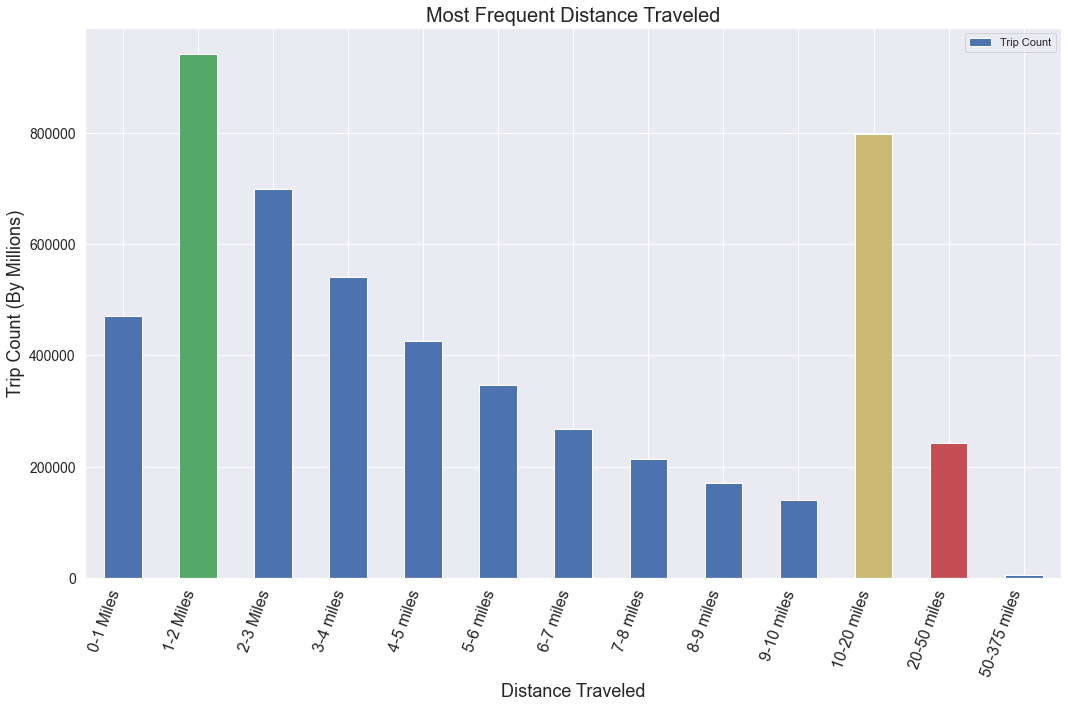

In [25]:
small_df_drop.plot(kind="bar", color = "bgbbbbbbbbyr",figsize=(15,10))
plt.xticks(rotation=70, ha='right',fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Trip Count (By Millions)',fontsize=18)
plt.xlabel('Distance Traveled',fontsize=18)
plt.title('Most Frequent Distance Traveled',fontsize=20)
plt.tight_layout()


plt.savefig("Images/Average_Trip_Bar_Chart.png");

In [28]:
trip_df_reduced

,Trip Start Timestamp,Trip Seconds,Trip Miles
0,2020-03-01 00:15:00,320.0,1.5
1,2020-03-01 00:15:00,1512.0,8.8
2,2020-03-01 00:15:00,188.0,0.6
3,2020-03-01 00:15:00,1774.0,6.9
4,2020-03-01 00:15:00,672.0,2.0
...,...,...,...
5265924,2020-03-31,901.0,3.7
5265925,2020-03-31,2035.0,15.0
5265926,2020-03-31,572.0,3.7
5265927,2020-03-31,850.0,4.3


In [29]:
time_reduced_df = trip_df_reduced.drop(columns=["Trip Start Timestamp", "Trip Miles"])
time_reduced_df


,Trip Seconds
0,320.0
1,1512.0
2,188.0
3,1774.0
4,672.0
...,...
5265924,901.0
5265925,2035.0
5265926,572.0
5265927,850.0


In [30]:
sorted_times = time_reduced_df.sort_values(["Trip Seconds"], ascending=True)
sorted_times

,Trip Seconds
1501097,0.0
492225,0.0
3215023,0.0
648745,0.0
4541869,0.0
...,...
4035200,28434.0
2678436,30780.0
3439998,33131.0
246790,38292.0


In [31]:
size_binss = [0, 225, 450, 900, 1800, 3600, 43200]
group_names_time = ["0-225 Seconds","225-450 Seconds", "450-900 Seconds", "900-1800 Seconds", "1800-3600 Seconds", "3600-43200 Seconds"]

# Use reasonable bins  
sorted_times["Trip Time"]= pd.cut(sorted_times["Trip Seconds"], size_binss, labels=group_names_time)
sorted_times.dropna(how ='any', inplace=True) 
sorted_times


,Trip Seconds,Trip Time
4309349,1.0,0-225 Seconds
790916,1.0,0-225 Seconds
2966498,1.0,0-225 Seconds
1169874,1.0,0-225 Seconds
4305325,1.0,0-225 Seconds
...,...,...
4035200,28434.0,3600-43200 Seconds
2678436,30780.0,3600-43200 Seconds
3439998,33131.0,3600-43200 Seconds
246790,38292.0,3600-43200 Seconds


In [34]:
sorted_times["Trip Count"] = np.arange(len(sorted_times))
sorted_times

,Trip Seconds,Trip Time,Trip Count
4309349,1.0,0-225 Seconds,0
790916,1.0,0-225 Seconds,1
2966498,1.0,0-225 Seconds,2
1169874,1.0,0-225 Seconds,3
4305325,1.0,0-225 Seconds,4
...,...,...,...
4035200,28434.0,3600-43200 Seconds,5265883
2678436,30780.0,3600-43200 Seconds,5265884
3439998,33131.0,3600-43200 Seconds,5265885
246790,38292.0,3600-43200 Seconds,5265886


In [35]:
drop_column_time = sorted_times.drop(columns=["Trip Seconds"])
drop_column_time.head(10)

,Trip Time,Trip Count
4309349,0-225 Seconds,0
790916,0-225 Seconds,1
2966498,0-225 Seconds,2
1169874,0-225 Seconds,3
4305325,0-225 Seconds,4
44356,0-225 Seconds,5
4309454,0-225 Seconds,6
4309632,0-225 Seconds,7
4308861,0-225 Seconds,8
1882404,0-225 Seconds,9


In [36]:
grouped_sorted_time=drop_column_time.groupby("Trip Time").nunique()
grouped_sorted_time

,Trip Count
Trip Time,
0-225 Seconds,184222
225-450 Seconds,867420
450-900 Seconds,1896416
900-1800 Seconds,1746474
1800-3600 Seconds,538905
3600-43200 Seconds,32451


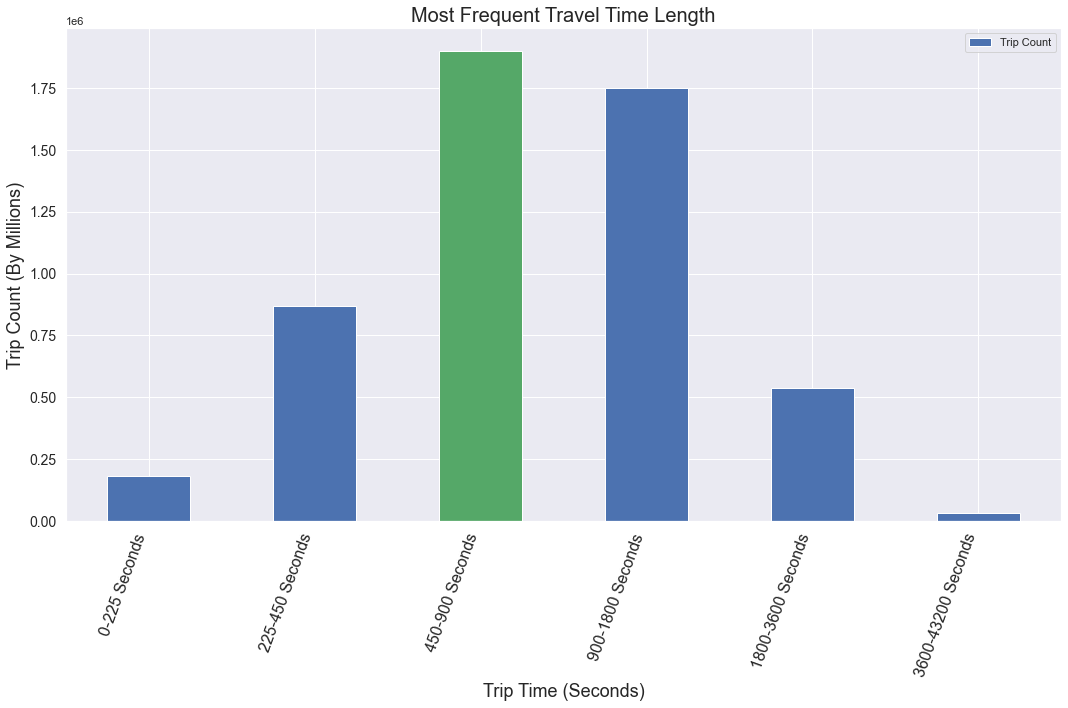

In [38]:
grouped_sorted_time.plot(kind="bar", color = "bbgbbb",figsize=(15,10))
plt.xticks(rotation=70, ha='right',fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Trip Count (By Millions)',fontsize=18)
plt.xlabel('Trip Time (Seconds)',fontsize=18)
plt.title('Most Frequent Travel Time Length',fontsize=20)
plt.tight_layout()
plt.savefig("Images/Average_Time_Bar_Chart.png");


In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Trip Time (Seconds)')
ax1.set_ylabel('Trip Count')
ax1.boxplot(sorted_times)
plt.show()
plt.savefig("Images/Boxplot_time.png");

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distance Range')
ax1.set_ylabel('Ride Count')
ax1.boxplot(sorted_distance)
plt.show()
plt.savefig("Images/Boxplot_distance.png");

##Outliers for the longest and shortest ride by time

quartiles = drop_column_time.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr = upperq-lowerq
    
lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Print Distnace, IQRs 
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is : {quartiles[0.5]}\n")
    
#Outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
##Outliers for the longest and shortest ride by distance

quartiles = sorted_distance.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr = upperq-lowerq
    
lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Print Distnace, IQRs 
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is : {quartiles[0.5]}\n")
    
#Outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


